In [1]:
# preamble, load all required packages and setup some stuff
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pylab
import seaborn as sns
sns.set(context='notebook', palette='Dark2', font_scale=.75)  # for plots
pylab.rcParams['figure.dpi'] = 150

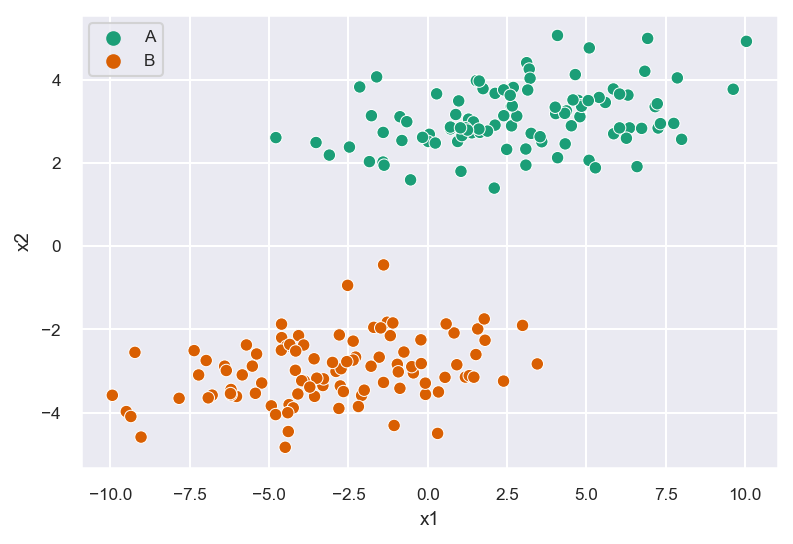

In [2]:
# load and visualize dataset
data = pd.read_csv('data/linsep.csv')

fig, ax = plt.subplots()
sns.scatterplot(x='x1', y='x2', hue=data['cls'].tolist(), data=data, ax=ax)
plt.show()

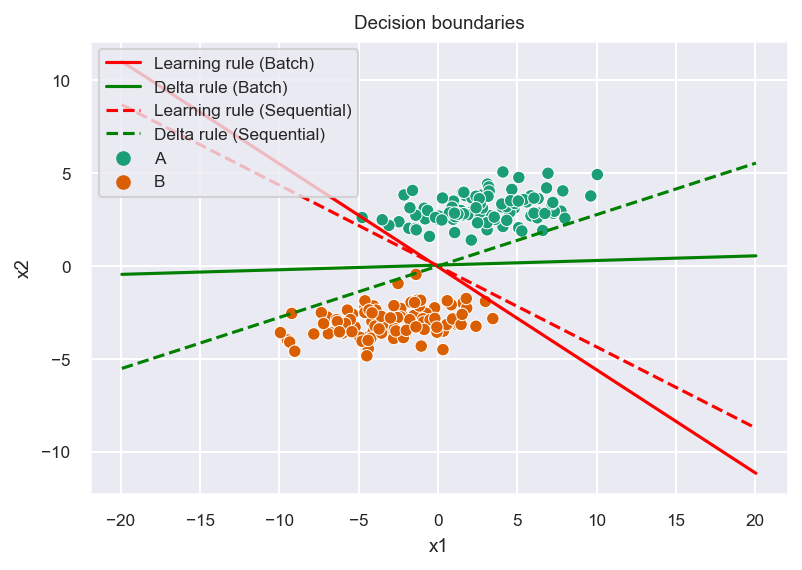

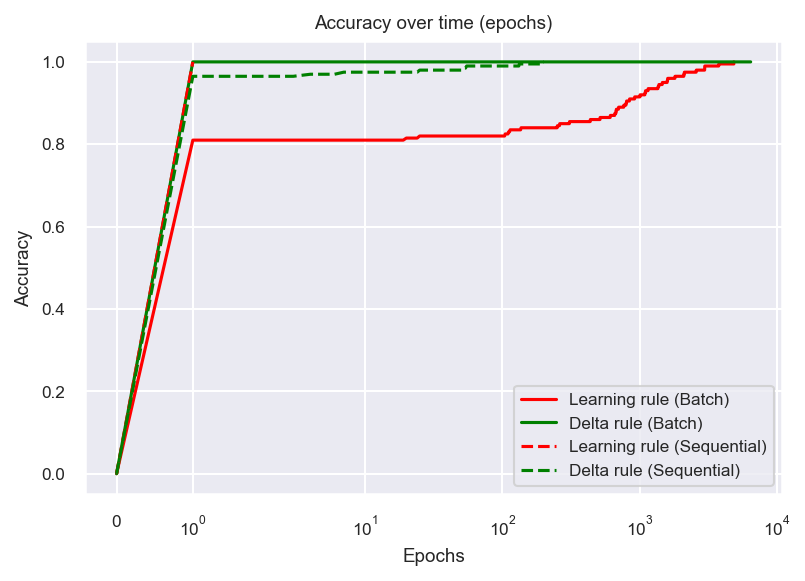

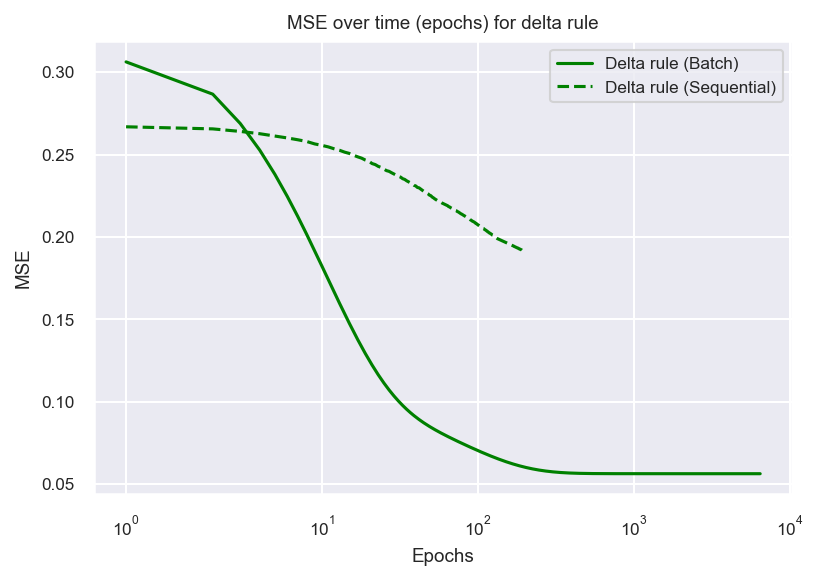

In [3]:
# import and instantiate Perceptron implementations
from slp import Perceptron, DeltaPerceptron
from typing import Optional, Tuple
    
class Plotter:
    def __init__(self, p: Perceptron, data: np.ndarray, eta: float=1.0, bias: bool=True, batch: bool=True):
        self._p = p
        self._data = data
        self._eta = eta
        self._bias = bias
        self._batch = batch
        
        self._acc = [0]
        self._err = [np.inf]
        self._n = data.shape[0]

    def _callback_fn(self, epochs, weights, misses, mse):
        self._acc.append((self._n - misses) / self._n)
        self._err.append(mse)
        
        
    def train_and_plot(self, name: str, style: str, bound_ax: plt.Axes, acc_ax: plt.Axes, bnd_x_range: Tuple[float, float], err_ax: Optional[plt.Axes]=None):
        self._p.train(self._data, bias=self._bias, batch=self._batch, eta0=self._eta, epoch_cb=self._callback_fn)
        
        # plot decision boundary
        x1 = np.array(bnd_x_range)
        weights = self._p.weights
        if not self._bias:
            # just add a zero to make the calculations work without the bias
            weights = np.append(weights, 0)

        x2 = (-1 * ((weights[0] * x1) + weights[2])) / weights[1]
        bound_ax.plot(x1, x2, style, label=name)
        
        
        # plot accuracy
        acc_ax.plot(range(0, self._p.epochs + 1), self._acc, style, label=name)
        acc_ax.set_xlabel('Epochs')
        acc_ax.set_ylabel('Accuracy')
        
        # plot MSE:
        if err_ax is not None:
            err_ax.plot(range(0, self._p.epochs + 1), self._err, style, label=name)
            err_ax.set_xlabel('Epochs')
            err_ax.set_ylabel('MSE')
        
        
# perceptrons
p = Perceptron(dims=2)
dp = DeltaPerceptron(dims=2)
p_seq = Perceptron(dims=2)
dp_seq = DeltaPerceptron(dims=2)

# prepare data for training perceptrons
p_data = data.copy()
p_data['cls'] = p_data['cls'].apply(lambda c: 0 if c == 'A' else 1).astype('category')

# prepare data for training deltaperceptrons
# delta rule uses symmetric target values
dp_data = data.copy()
dp_data['cls'] = dp_data['cls'].apply(lambda c: -1 if c == 'A' else 1).astype('category')


# plotters
eta = 1e-5
p_plot = Plotter(p, p_data.to_numpy(), eta=eta, bias=True, batch=True)
dp_plot = Plotter(dp, dp_data.to_numpy(), eta=eta, bias=True, batch=True)
p_seq_plot = Plotter(p_seq, p_data.to_numpy(), eta=eta, bias=True, batch=False)
dp_seq_plot = Plotter(dp_seq, dp_data.to_numpy(), eta=eta, bias=True, batch=False)

# plotting
pad = 10
min_x = data['x1'].min() - pad
max_x = data['x1'].max() + pad
min_y = data['x2'].min() - pad
max_y = data['x2'].max() + pad

fig1, cls_ax = plt.subplots()
cls_ax.set_title('Decision boundaries')
sns.scatterplot(x='x1', y='x2', hue=data['cls'].tolist(), data=data, ax=cls_ax)

fig2, acc_ax = plt.subplots()
acc_ax.set_title('Accuracy over time (epochs)')

fig3, err_ax = plt.subplots()
err_ax.set_title('MSE over time (epochs) for delta rule')

p_plot.train_and_plot(name='Learning rule (Batch)', style='r-', bound_ax=cls_ax, acc_ax=acc_ax, bnd_x_range=(min_x, max_x))
dp_plot.train_and_plot(name='Delta rule (Batch)', style='g-', bound_ax=cls_ax, acc_ax=acc_ax, bnd_x_range=(min_x, max_x), err_ax=err_ax)
p_seq_plot.train_and_plot(name='Learning rule (Sequential)', style='r--', bound_ax=cls_ax, acc_ax=acc_ax, bnd_x_range=(min_x, max_x))
dp_seq_plot.train_and_plot(name='Delta rule (Sequential)', style='g--', bound_ax=cls_ax, acc_ax=acc_ax, bnd_x_range=(min_x, max_x), err_ax=err_ax)
    
cls_ax.legend()
acc_ax.legend()
err_ax.legend()

acc_ax.set_xscale('symlog')
err_ax.set_xscale('symlog')

plt.show()

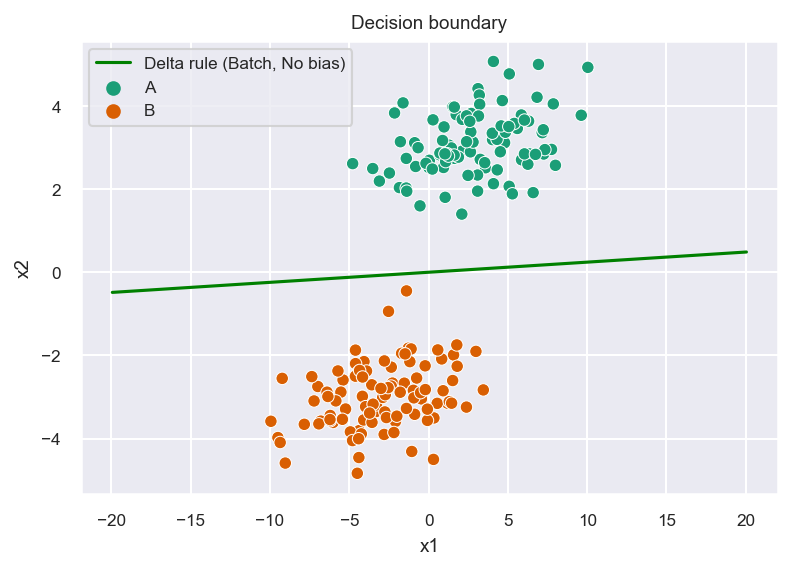

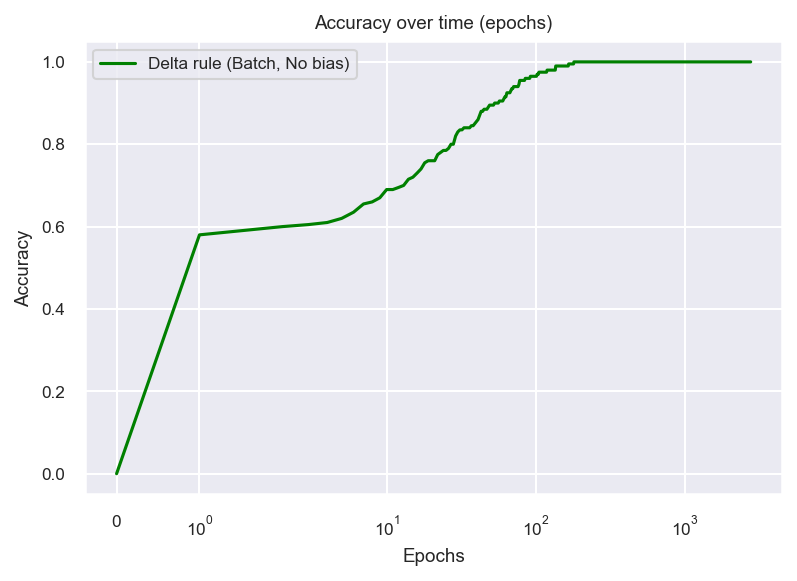

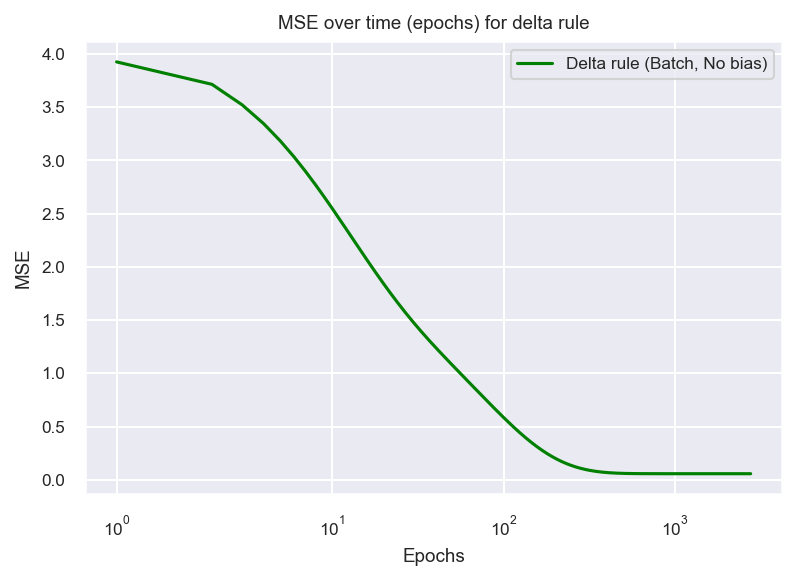

In [4]:
# tests without bias
dp_no_bias = DeltaPerceptron(dims=2)
dp_no_bias_plot = Plotter(dp_no_bias, dp_data.to_numpy(), eta=eta, bias=False, batch=True)

fig1, cls_ax = plt.subplots()
cls_ax.set_title('Decision boundary')
sns.scatterplot(x='x1', y='x2', hue=data['cls'].tolist(), data=data, ax=cls_ax)

fig2, acc_ax = plt.subplots()
acc_ax.set_title('Accuracy over time (epochs)')

fig3, err_ax = plt.subplots()
err_ax.set_title('MSE over time (epochs) for delta rule')

dp_no_bias_plot.train_and_plot(name='Delta rule (Batch, No bias)', style='g-', bound_ax=cls_ax, acc_ax=acc_ax, bnd_x_range=(min_x, max_x), err_ax=err_ax)
    
cls_ax.legend()
acc_ax.legend()
err_ax.legend()

acc_ax.set_xscale('symlog')
err_ax.set_xscale('symlog')

plt.show()